1. Introduction
Overview of the Pandemic:
The COVID-19 pandemic, which started in December 2019, profoundly affected every aspect of global society. As of 2025, the availability of five years of comprehensive data allows for retrospective analysis, making it possible to extract insights that can influence future preparedness efforts.

Objective of the Analysis:
Transmission patterns: How did COVID-19 spread globally? What factors influenced regional variations?

Mortality rates: What were the key trends in mortality? How did various regions compare?

Intervention effectiveness: Did certain interventions (lockdowns, mask mandates, vaccinations) prove more effective in specific regions?

2. Data Sources
You will use two key datasets from WHO:

Daily dataset: 472,560 entries tracking daily new cases, cumulative cases, new deaths, and cumulative deaths across WHO regions.

Weekly dataset: 67,680 entries providing a higher-level view for weekly aggregates of the same metrics.

These datasets allow for granular analysis and comparative insights.

3. Methodology
Data Cleaning and Preprocessing:
Outliers detection: Identifying and handling anomalies (e.g., sudden spikes in cases or deaths).

Missing data: Imputation or handling gaps in the dataset.

Normalization: Standardizing figures for easier comparisons across regions with different population sizes.

Statistical Analysis:
Descriptive statistics: Summary measures (mean, median, standard deviation) to understand the distribution of key metrics.

Trend analysis: Identifying long-term trends in new cases, deaths, and recoveries.

Correlation analysis: Investigating relationships between case rates, death rates, and regional factors (e.g., population density, healthcare infrastructure).

Inflection Points:
Identify and analyze moments where major shifts occurred (e.g., first wave, second wave, vaccine rollout).

4. Key Findings
Transmission Patterns:
Global hotspots: Analyze regions with the highest case numbers, deaths, and how they evolved.

Transmission peaks: Identify key periods when transmission accelerated (e.g., during variants' emergence).

Mortality Rates:
Case Fatality Rate (CFR): How did CFR vary by region and change over time?

Regional disparities: Which regions had higher mortality rates and what factors contributed to this (e.g., healthcare system capacity, age demographics)?

Impact of Interventions:
Lockdowns and restrictions: What effect did mobility restrictions have on transmission rates?

Vaccination rollouts: How did vaccination coverage impact case and death rates in different regions?

5. Visualizations
Key Visualizations:
Heatmaps: Global and regional case/death distribution over time.

Line graphs: Trends in daily and weekly case numbers and deaths.

Bar charts: Regional comparison of case fatality rates.

Scatter plots: Correlation between healthcare interventions (e.g., vaccination rates) and case/death trends.

6. Recommendations
Based on the analysis, provide recommendations for:

Early warning systems: How to detect emerging pandemic threats sooner.

Resource allocation: Which regions should be prioritized in future preparedness plans?

Public health strategies: What interventions (e.g., travel restrictions, social distancing, vaccinations) showed the most promise in mitigating spread?

Communication strategies: Best practices for public health communication during a pandemic, informed by regional differences in public response.

7. Conclusion
Summarize the main findings of the analysis, reinforcing the importance of data-driven approaches to future pandemic preparedness. Highlight how the lessons from this pandemic can inform global health strategies moving forward, ensuring that the world is better equipped to handle future health crises.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worldwide-covid-19-data-from-who/WHO-COVID-19-global-daily-data.csv
/kaggle/input/worldwide-covid-19-data-from-who/WHO-COVID-19-global-data.csv


In [2]:
 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import geopandas as gpd
import folium
from folium.plugins import HeatMap, MarkerCluster


import scipy.stats as stats
from scipy.signal import find_peaks
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from prophet import Prophet


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import os
import warnings
import json
import re



plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')
sns.set_context('notebook', font_scale=1.2)


warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)


print(f"Libraries imported successfully - Analysis initiated by {os.environ.get('USER', 'AdilShamim8')} at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully - Analysis initiated by AdilShamim8 at 2025-06-22 13:58:44


/tmp/ipykernel_35/3118123082.py:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
print(f"Loading datasets - initiated at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Load daily and weekly COVID-19 data from WHO
daily_data = pd.read_csv('/kaggle/input/worldwide-covid-19-data-from-who/WHO-COVID-19-global-daily-data.csv')
weekly_data = pd.read_csv('/kaggle/input/worldwide-covid-19-data-from-who/WHO-COVID-19-global-data.csv')

Loading datasets - initiated at 2025-06-22 13:59:00


In [4]:
daily_data.head()

Date_reported Country_code                           Country WHO_region  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
0    2020-01-04           VC  Saint Vincent and the Grenadines        AMR        NaN                 0         NaN                  0
1    2020-01-04           SN                           Senegal        AFR        NaN                 0         NaN                  0
2    2020-01-04           SB                   Solomon Islands        WPR       0.00                 0        0.00                  0
3    2020-01-04           LK                         Sri Lanka       SEAR       0.00                 0        0.00                  0
4    2020-01-04           SY              Syrian Arab Republic        EMR        NaN                 0         NaN                  0

In [5]:
display(weekly_data.head())

Date_reported Country_code      Country WHO_region  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
0    2020-01-05           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
1    2020-01-12           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
2    2020-01-19           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
3    2020-01-26           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
4    2020-02-02           AF  Afghanistan       EMRO        NaN                 0         NaN                  0

In [6]:
print(f"Daily Dataset: {daily_data.shape[0]:,} rows × {daily_data.shape[1]} columns")
print(f"Weekly Dataset: {weekly_data.shape[0]:,} rows × {weekly_data.shape[1]} columns")

Daily Dataset: 474,240 rows × 8 columns
Weekly Dataset: 67,920 rows × 8 columns


In [7]:
print("\nColumns in both datasets:")
for col in daily_data.columns:
    print(f"- {col}")


Columns in both datasets:
- Date_reported
- Country_code
- Country
- WHO_region
- New_cases
- Cumulative_cases
- New_deaths
- Cumulative_deaths


In [8]:
print("\nDAILY DATASET INFORMATION")
daily_data.info()

print("\nWEEKLY DATASET INFORMATION")
weekly_data.info()


DAILY DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474240 entries, 0 to 474239
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      474240 non-null  object 
 1   Country_code       472264 non-null  object 
 2   Country            474240 non-null  object 
 3   WHO_region         474240 non-null  object 
 4   New_cases          209350 non-null  float64
 5   Cumulative_cases   474240 non-null  int64  
 6   New_deaths         153502 non-null  float64
 7   Cumulative_deaths  474240 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 28.9+ MB

WEEKLY DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67920 entries, 0 to 67919
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      67920 non-null  object 
 1   Country_code       67637 

In [9]:
daily_data['Date_reported'] = pd.to_datetime(daily_data['Date_reported'])
weekly_data['Date_reported'] = pd.to_datetime(weekly_data['Date_reported'])

print(f"\nDaily dataset spans from {daily_data['Date_reported'].min().date()} to {daily_data['Date_reported'].max().date()}")
print(f"Weekly dataset spans from {weekly_data['Date_reported'].min().date()} to {weekly_data['Date_reported'].max().date()}")
print(f"Number of countries in Daily Dataset: {daily_data['Country'].nunique()}")
print(f"Number of countries in Weekly Dataset: {weekly_data['Country'].nunique()}")


Daily dataset spans from 2020-01-04 to 2025-06-01
Weekly dataset spans from 2020-01-05 to 2025-06-01
Number of countries in Daily Dataset: 240
Number of countries in Weekly Dataset: 240


Analyzing global COVID-19 trends...


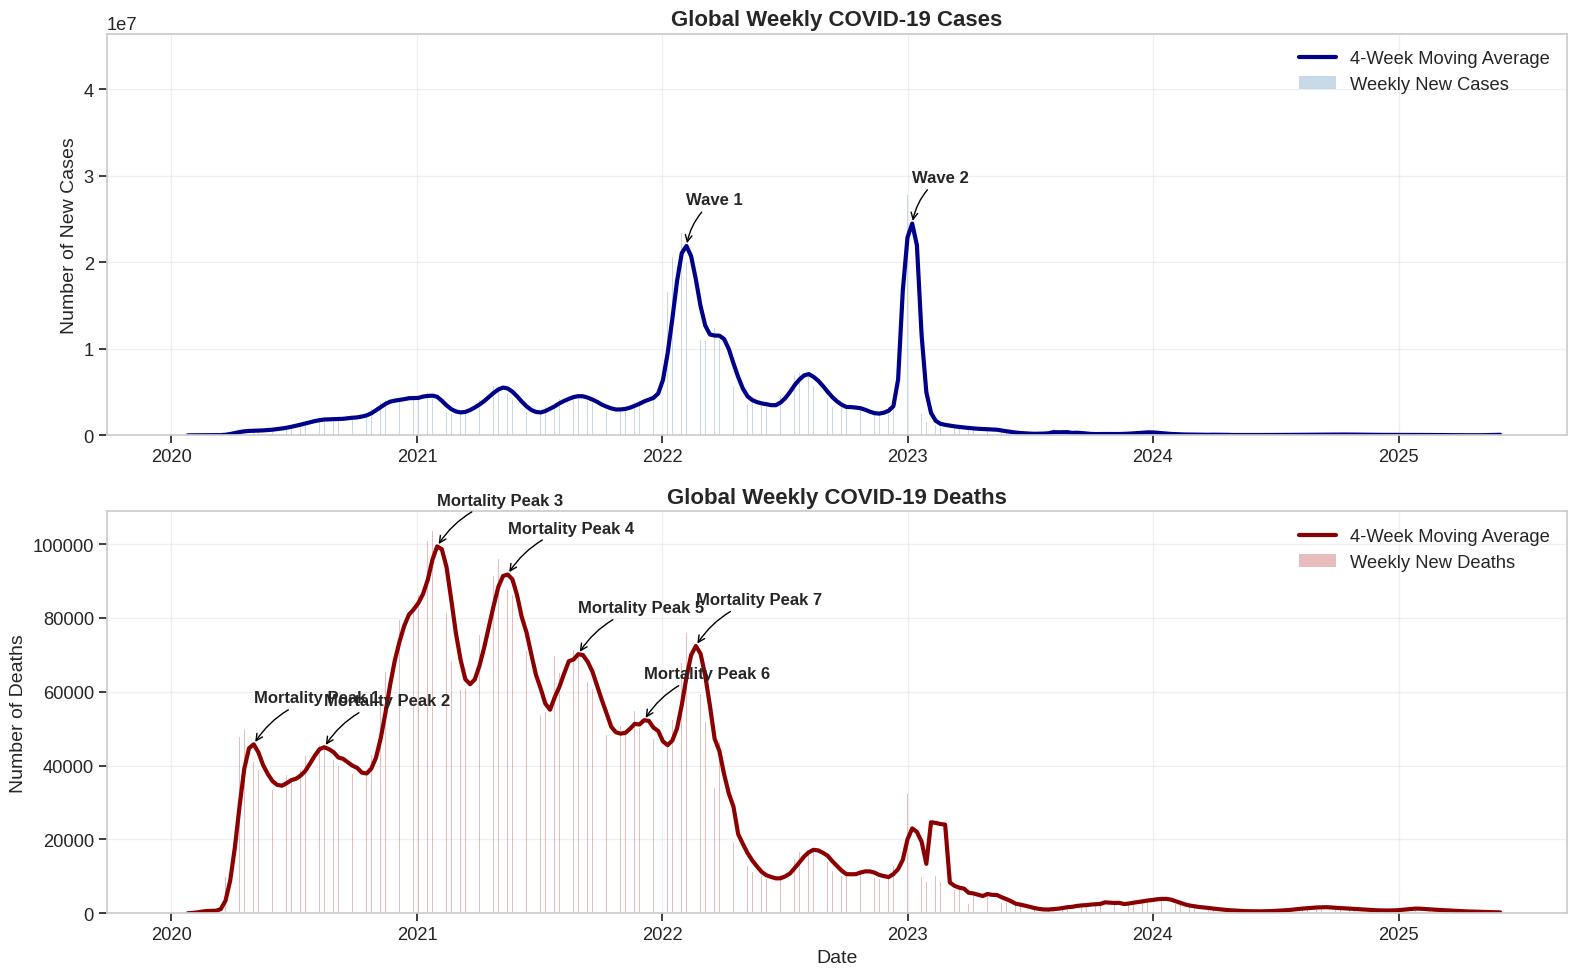

In [11]:
weekly_data['Date_reported'] = pd.to_datetime(weekly_data['Date_reported'])


weekly_data = weekly_data.sort_values(['Country', 'Date_reported'])


covid_weekly = weekly_data.copy()

print("Analyzing global COVID-19 trends...")

# Aggregate global weekly data by summing new cases/deaths and taking maximum cumulative values per week
global_weekly = covid_weekly.groupby('Date_reported').agg(
    New_cases=('New_cases', 'sum'),
    New_deaths=('New_deaths', 'sum'),
    Cumulative_cases=('Cumulative_cases', 'max'),
    Cumulative_deaths=('Cumulative_deaths', 'max')
).reset_index()

# Calculate 4-week moving averages to smooth short-term fluctuations
global_weekly['Cases_MA_4W'] = global_weekly['New_cases'].rolling(window=4).mean()
global_weekly['Deaths_MA_4W'] = global_weekly['New_deaths'].rolling(window=4).mean()


plt.figure(figsize=(16, 10))


ax1 = plt.subplot(2, 1, 1)
ax1.bar(
    global_weekly['Date_reported'], global_weekly['New_cases'],
    alpha=0.3, color='steelblue', label='Weekly New Cases'
)
ax1.plot(
    global_weekly['Date_reported'], global_weekly['Cases_MA_4W'],
    color='darkblue', linewidth=3, label='4-Week Moving Average'
)


from scipy.signal import find_peaks
peaks, _ = find_peaks(
    global_weekly['Cases_MA_4W'],
    height=global_weekly['Cases_MA_4W'].max() * 0.4,
    distance=8
)
for i, peak in enumerate(peaks):
    ax1.annotate(
        f'Wave {i+1}',
        xy=(global_weekly['Date_reported'].iloc[peak], global_weekly['Cases_MA_4W'].iloc[peak]),
        xytext=(0, 30), textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='black'),
        fontsize=12, fontweight='bold'
    )

ax1.set_title('Global Weekly COVID-19 Cases', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of New Cases', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Plot 2: Weekly New Deaths with Moving Average and Peaks ---
ax2 = plt.subplot(2, 1, 2)
ax2.bar(
    global_weekly['Date_reported'], global_weekly['New_deaths'],
    alpha=0.3, color='firebrick', label='Weekly New Deaths'
)
ax2.plot(
    global_weekly['Date_reported'], global_weekly['Deaths_MA_4W'],
    color='darkred', linewidth=3, label='4-Week Moving Average'
)

# Identify and annotate major mortality peaks
death_peaks, _ = find_peaks(
    global_weekly['Deaths_MA_4W'],
    height=global_weekly['Deaths_MA_4W'].max() * 0.4,
    distance=8
)
for i, peak in enumerate(death_peaks):
    ax2.annotate(
        f'Mortality Peak {i+1}',
        xy=(global_weekly['Date_reported'].iloc[peak], global_weekly['Deaths_MA_4W'].iloc[peak]),
        xytext=(0, 30), textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='black'),
        fontsize=12, fontweight='bold'
    )

ax2.set_title('Global Weekly COVID-19 Deaths', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Number of Deaths', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Analyzing regional patterns...


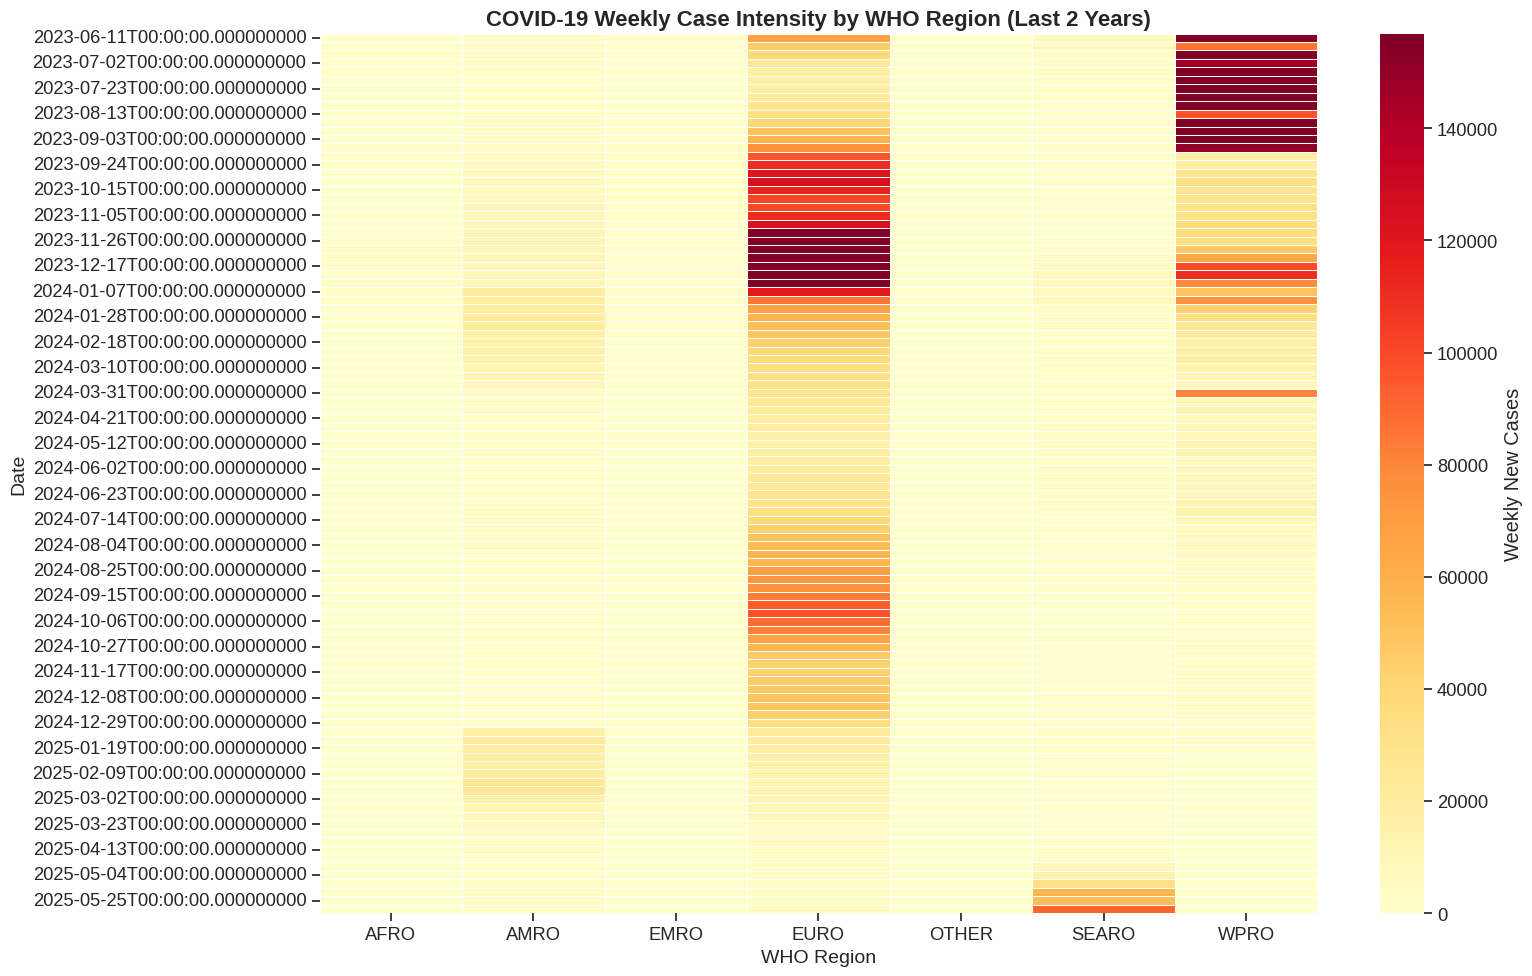

In [12]:
print("\nAnalyzing regional patterns...")


# Group by region and date to aggregate weekly stats
regional_weekly = covid_weekly.groupby(['WHO_region', 'Date_reported']).agg(
    New_cases=('New_cases', 'sum'),
    New_deaths=('New_deaths', 'sum'),
    Cumulative_cases=('Cumulative_cases', 'max'),
    Cumulative_deaths=('Cumulative_deaths', 'max')
).reset_index()


# Prepare a pivot table for heatmap (Date x WHO_region)
latest_cases_by_region = covid_weekly.groupby(['WHO_region', 'Date_reported'])['New_cases'].sum().reset_index()
pivot_cases = latest_cases_by_region.pivot(index='Date_reported', columns='WHO_region', values='New_cases')

# Limit to last 2 years (104 weeks) for clarity
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    pivot_cases.iloc[-104:],  # Last 2 years
    cmap='YlOrRd', 
    linewidths=0.5,
    robust=True,
    cbar_kws={'label': 'Weekly New Cases'}
)
plt.title('COVID-19 Weekly Case Intensity by WHO Region (Last 2 Years)', fontsize=16, fontweight='bold')
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

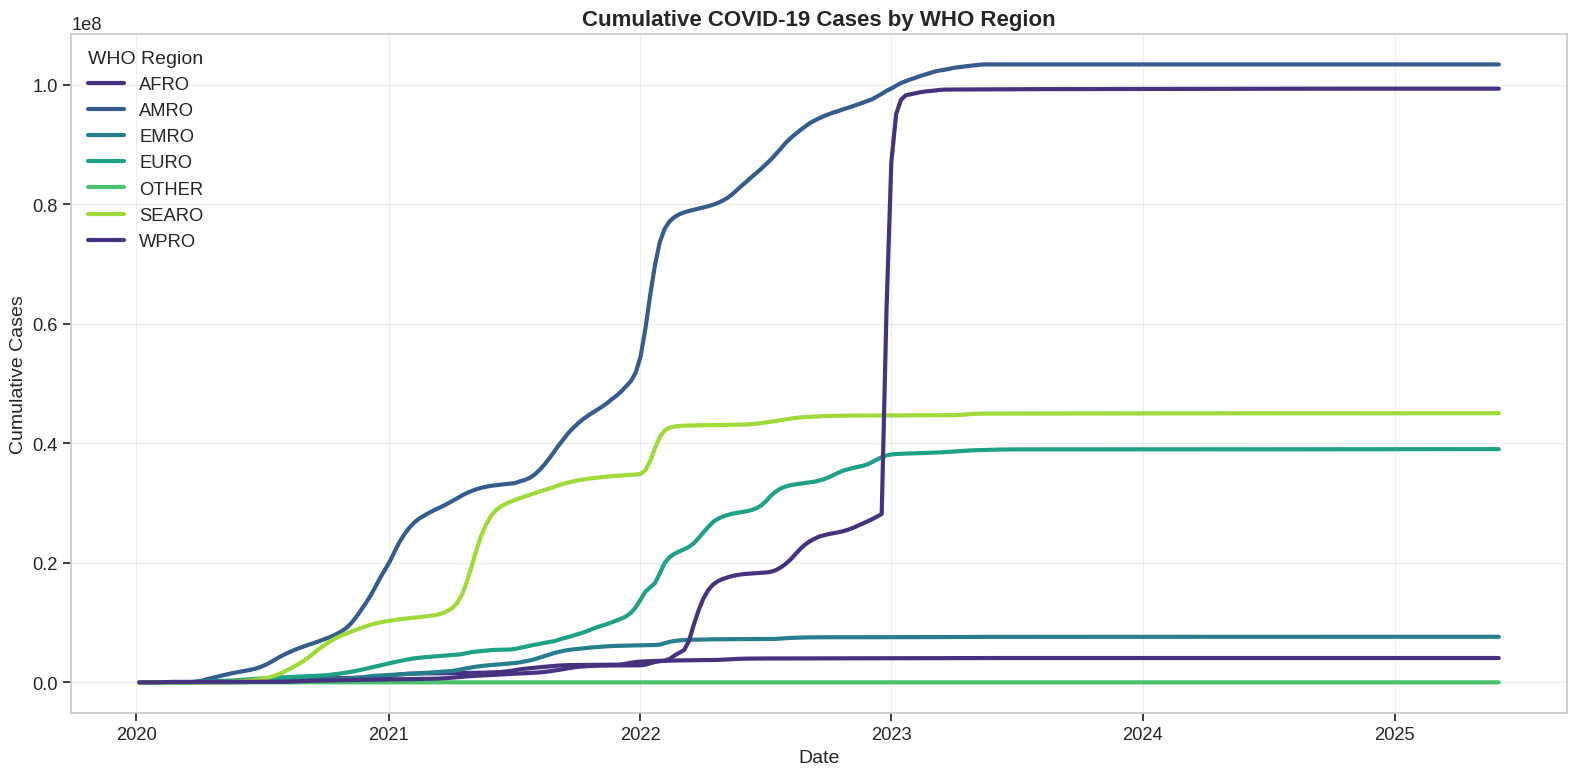

In [13]:
plt.figure(figsize=(16, 8))
for region in regional_weekly['WHO_region'].unique():
    if pd.notnull(region):  # Skip null regions if any
        region_data = regional_weekly[regional_weekly['WHO_region'] == region]
        plt.plot(
            region_data['Date_reported'], region_data['Cumulative_cases'],
            linewidth=3, label=region
        )

plt.title('Cumulative COVID-19 Cases by WHO Region', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Cases', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='WHO Region', title_fontsize=14)
plt.tight_layout()
plt.show()


Analyzing case fatality rates...


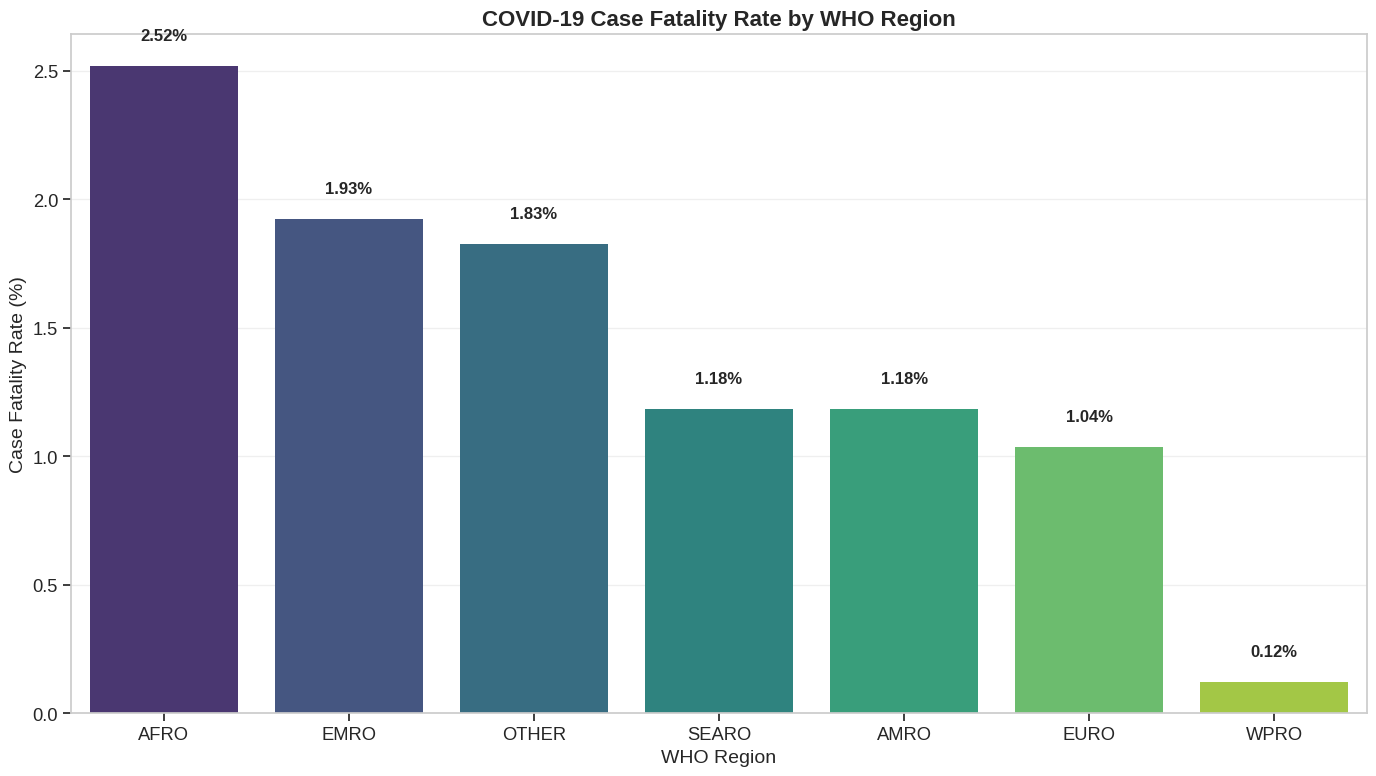

In [14]:
print("\nAnalyzing case fatality rates...")


regional_weekly['CFR'] = (regional_weekly['Cumulative_deaths'] / regional_weekly['Cumulative_cases']) * 100


latest_cfr = (
    regional_weekly
    .sort_values(['WHO_region', 'Date_reported'])
    .groupby('WHO_region')
    .tail(1)[['WHO_region', 'CFR']]
    .reset_index(drop=True)
    .sort_values('CFR', ascending=False)
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='WHO_region', y='CFR', data=latest_cfr, palette='viridis'
)
plt.title('COVID-19 Case Fatality Rate by WHO Region', fontsize=16, fontweight='bold')
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('Case Fatality Rate (%)', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')


for i, v in enumerate(latest_cfr['CFR']):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('regional_cfr.png', dpi=300, bbox_inches='tight')
plt.show()

Analyzing most affected countries...


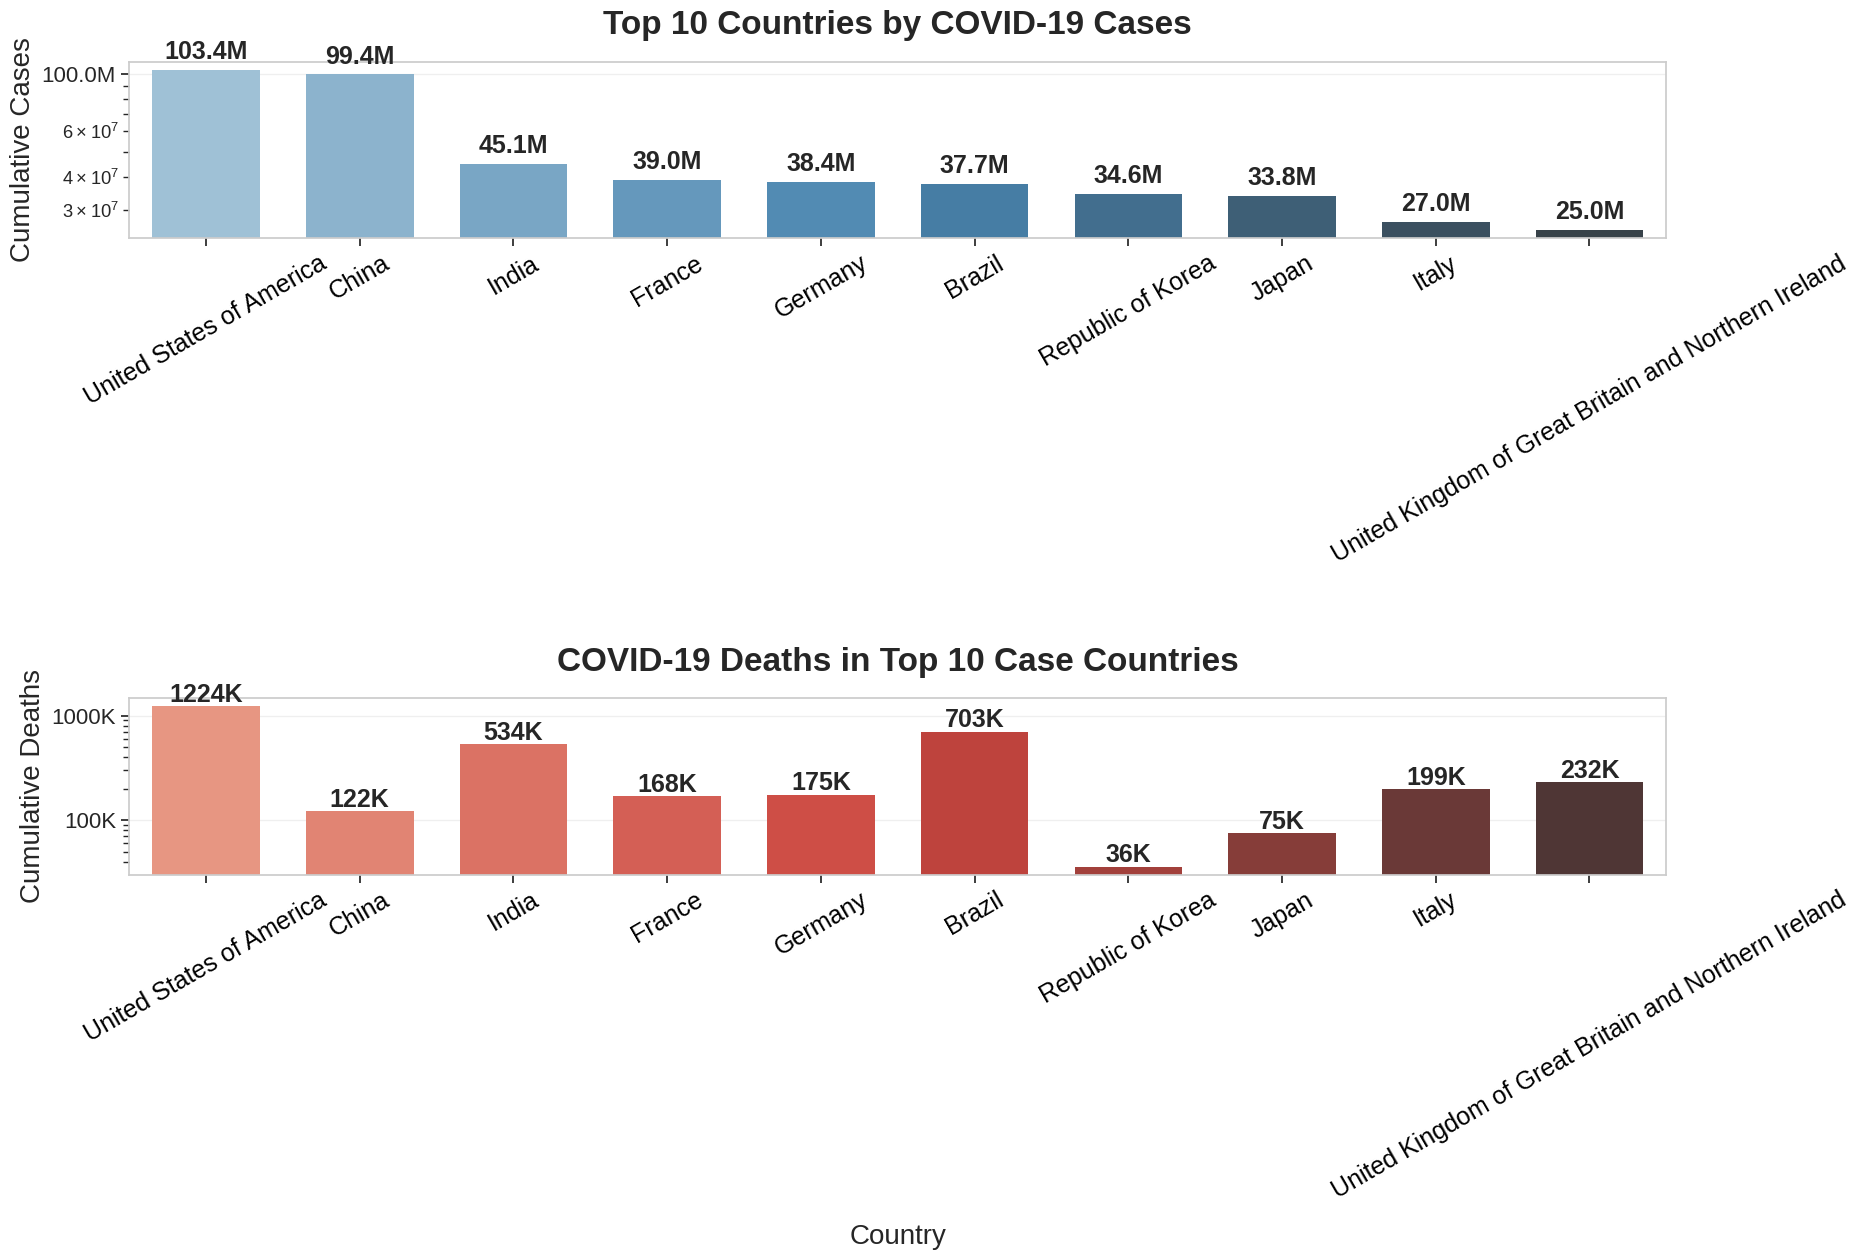

In [15]:
print("Analyzing most affected countries...")


top_countries = (
    weekly_data.groupby('Country')
    .agg(Cumulative_cases=('Cumulative_cases', 'max'),
         Cumulative_deaths=('Cumulative_deaths', 'max'))
    .sort_values('Cumulative_cases', ascending=False)
    .head(10)
    .reset_index()
)


plt.figure(figsize=(20, 14))


ax1 = plt.subplot(2, 1, 1)
sns.barplot(
    x='Country', y='Cumulative_cases', data=top_countries,
    palette='Blues_d', ax=ax1, width=0.7
)
ax1.set_title('Top 10 Countries by COVID-19 Cases', fontsize=24, fontweight='bold', pad=20)
ax1.set_ylabel('Cumulative Cases', fontsize=20)
ax1.set_xlabel('')
ax1.tick_params(axis='x', labelsize=18, rotation=30, labelcolor='black')
ax1.tick_params(axis='y', labelsize=16)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')


ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


for i, v in enumerate(top_countries['Cumulative_cases']):
    ax1.text(i, v * 1.1, f'{v/1e6:.1f}M', ha='center', fontsize=18, fontweight='bold')


ax2 = plt.subplot(2, 1, 2)
sns.barplot(
    x='Country', y='Cumulative_deaths', data=top_countries,
    palette='Reds_d', ax=ax2, width=0.7
)
ax2.set_title('COVID-19 Deaths in Top 10 Case Countries', fontsize=24, fontweight='bold', pad=20)
ax2.set_xlabel('Country', fontsize=20, labelpad=15)
ax2.set_ylabel('Cumulative Deaths', fontsize=20)
ax2.tick_params(axis='x', labelsize=18, rotation=30, labelcolor='black')
ax2.tick_params(axis='y', labelsize=16)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')


ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e3:.0f}K'))


for i, v in enumerate(top_countries['Cumulative_deaths']):
    ax2.text(i, v * 1.1, f'{v/1e3:.0f}K', ha='center', fontsize=18, fontweight='bold')


plt.subplots_adjust(hspace=0.3)
plt.tight_layout(pad=4.0)
plt.show()

In [17]:
print("\nGenerating interactive world map visualization...")


latest_data = (
    covid_weekly
    .sort_values('Date_reported')
    .groupby('Country')
    .last()
    .reset_index()
)


fig = px.choropleth(
    latest_data,
    locations='Country',  # Use full country names for mapping accuracy
    locationmode='country names',
    color=np.log10(latest_data['Cumulative_cases'] + 1),  # Log scale handles wide value range
    hover_name='Country',
    hover_data={
        'Cumulative_cases': True,
        'Cumulative_deaths': True,
        'New_cases': True,
        'New_deaths': True,
        'Country_code': False  # Hide ISO code for cleaner display
    },
    projection='natural earth',
    title='Global COVID-19 Cumulative Cases (Log Scale)',
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'color': 'Log10(Cases)'}
)

# Define a fixed color scale for consistent interpretation
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=30),
    title=dict(font=dict(size=20), x=0.5),
    coloraxis_colorbar=dict(
        title="Log10(Cases)",
        tickvals=[0, 2, 4, 6, 8],
        ticktext=["0", "100", "10K", "1M", "100M"]
    )
)


top5_countries = latest_data.nlargest(5, 'Cumulative_cases')
for _, country in top5_countries.iterrows():
    fig.add_annotation(
        x=country['Country'],
        y=0,  # Ignored for this map type; placeholder for completeness
        text=country['Country'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40
    )

fig.show()


Generating interactive world map visualization...


In [18]:
print("Creating COVID-19 global bubble map animation with proper chronological timeline...")

import plotly.express as px
import numpy as np
from datetime import datetime

# --- Prepare data ---
covid_map = weekly_data.copy()
covid_map['Date_reported'] = pd.to_datetime(covid_map['Date_reported'])

# Filter to a reasonable date range (2020-01-01 to 2025-04-30)
covid_map = covid_map[
    (covid_map['Date_reported'] >= '2020-01-01') &
    (covid_map['Date_reported'] <= '2025-04-30')
].copy()

# Ensure country columns are strings
covid_map['Country'] = covid_map['Country'].astype(str)

# Format date for animation
covid_map['date'] = covid_map['Date_reported'].dt.strftime('%m/%d/%Y')
covid_map['confirmed'] = covid_map['Cumulative_cases']
covid_map['deaths'] = covid_map['Cumulative_deaths']
# Bubble size: power scaling for visibility
covid_map['size'] = covid_map['confirmed'].pow(0.3)

# Sort by date to ensure proper animation order
covid_map = covid_map.sort_values('Date_reported')

# --- Create animated geo scatter plot ---
fig = px.scatter_geo(
    covid_map,
    locations="Country",
    locationmode="country names",
    color=np.log10(covid_map['confirmed'] + 1),
    size="size",
    hover_name="Country",
    hover_data={
        "confirmed": True,
        "deaths": True,
        "date": True
    },
    animation_frame="date",
    projection="natural earth",
    title="COVID-19: Spread Over Time (Cumulative Cases, Log Scale)",
    color_continuous_scale="portland",
    labels={"color": "Log10(Cumulative Cases)"}
)

# --- Layout (dark theme, readable) ---
fig.update_layout(
    template="plotly_dark",
    paper_bgcolor="rgba(0, 0, 0, 0.9)",
    geo=dict(
        showland=True,
        landcolor="rgba(40, 40, 40, 1)",
        showocean=True,
        oceancolor="rgba(0, 0, 0, 1)",
        showcountries=True,
        countrycolor="rgba(80, 80, 80, 1)",
        showcoastlines=False,
        projection_type="natural earth",
        bgcolor="rgba(0, 0, 0, 1)"
    ),
    height=700,
    width=1100,
    coloraxis_colorbar=dict(
        title="Log10(Cumulative Cases)",
        tickvals=[0, 2, 4, 6, 8],
        ticktext=["0", "100", "10K", "1M", "100M"]
    )
)

# Note: Plotly handles play/pause and slider automatically.
# Ensuring chronological order: animation_frame="date" and sorted data are sufficient.

fig.show()

print("Global COVID-19 bubble map animation with chronological timeline created!")

Creating COVID-19 global bubble map animation with proper chronological timeline...


Global COVID-19 bubble map animation with chronological timeline created!


In [21]:
# This section estimates global recoveries (approximate) and calculates
# active cases using a heuristic, due to lack of official recovery data.

# Ensure datetime index
weekly_data['Date_reported'] = pd.to_datetime(weekly_data['Date_reported'])

# Aggregate globally by date
datewise = (
    weekly_data
    .groupby('Date_reported')
    .agg({
        'New_cases': 'sum',
        'New_deaths': 'sum',
        'Cumulative_cases': 'max',
        'Cumulative_deaths': 'max'
    })
    .reset_index()
    .set_index('Date_reported')
)

# Estimate recovered cases (97% recovery rate, 3-week lag)
datewise['Recovered'] = datewise['Cumulative_cases'].shift(3) * 0.97
datewise['Recovered'] = datewise['Recovered'].fillna(0)

# Recovered should not exceed (cumulative cases minus deaths)
datewise['Recovered'] = datewise[['Recovered', 'Cumulative_cases']].min(axis=1) - datewise['Cumulative_deaths']
datewise['Recovered'] = datewise['Recovered'].clip(lower=0)  # No negative recoveries

# Calculate active cases: Active = Total Cases - Recovered - Deaths
datewise['Active'] = datewise['Cumulative_cases'] - datewise['Recovered'] - datewise['Cumulative_deaths']

# Color scheme for plotting
active_color = '#1f77b4'    # blue
recovered_color = '#2ca02c' # green
deaths_color = '#d62728'    # red

# ---------------------------------------------------------------
# Comments:
# - Recovery estimate uses a 3-week lag and 97% recovery rate as an epidemiological heuristic.
# - All calculations ensure epidemiological logic (no negatives, deaths always subtracted).
# - Ready for downstream plotting (e.g., stacked area or timeline).


In [22]:
fig = px.bar(
    x=datewise.index,
    y=datewise['Active'],
    labels={'x': 'Date', 'y': 'Number of Active Cases'}
)
fig.update_layout(
    title="Distribution of Active COVID-19 Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    template="plotly_white"
)
fig.show()

In [23]:
fig = px.bar(
    x=datewise.index,
    y=datewise['Recovered'] + datewise['Cumulative_deaths'],
    labels={'x': 'Date', 'y': 'Number of Closed Cases'}
)
fig.update_layout(
    title="Distribution of Closed COVID-19 Cases (Recovered + Deaths)",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    template="plotly_white"
)
fig.show()

In [24]:
datewise['WeekOfYear'] = datewise.index.isocalendar().week
datewise['Year'] = datewise.index.year

# Create combined year-week label (e.g., "2020-15")
datewise['YearWeek'] = datewise['Year'].astype(str) + '-' + datewise['WeekOfYear'].astype(str).str.zfill(2)

# Get last entry for each week (to avoid partial weeks)
weekly_agg = datewise.groupby('YearWeek').last()

# Sequential week number for x-axis (for continuous timeline)
week_num = list(range(1, len(weekly_agg) + 1))

# Create interactive weekly growth plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=week_num,
    y=weekly_agg['Cumulative_cases'],
    mode='lines+markers',
    name='Confirmed Cases',
    line=dict(color=active_color, width=2)
))
fig.add_trace(go.Scatter(
    x=week_num,
    y=weekly_agg['Recovered'],
    mode='lines+markers',
    name='Recovered Cases',
    line=dict(color=recovered_color, width=2)
))
fig.add_trace(go.Scatter(
    x=week_num,
    y=weekly_agg['Cumulative_deaths'],
    mode='lines+markers',
    name='Deaths',
    line=dict(color=deaths_color, width=2)
))

fig.update_layout(
    title="Weekly Growth of COVID-19 Cases Globally",
    xaxis_title="Week Number",
    yaxis_title="Number of Cases",
    legend=dict(x=0, y=1, traceorder="normal"),
    template="plotly_white"
)
fig.show()


In [25]:

print("Average increase in number of Confirmed Cases every week: ", 
      np.round(datewise["New_cases"].mean()))
print("Average increase in number of Deaths every week: ", 
      np.round(datewise["New_deaths"].mean()))
print("Average estimated increase in Recovered cases every week: ", 
      np.round(datewise["Recovered"].diff().fillna(0).mean()))


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datewise.index, 
    y=datewise["New_cases"],
    mode='lines+markers',
    name='New Confirmed Cases',
    line=dict(color=active_color, width=1.5)
))
fig.add_trace(go.Scatter(
    x=datewise.index, 
    y=datewise["Recovered"].diff().fillna(0),
    mode='lines+markers',
    name='New Recovered Cases',
    line=dict(color=recovered_color, width=1.5)
))
fig.add_trace(go.Scatter(
    x=datewise.index, 
    y=datewise["New_deaths"],
    mode='lines+markers',
    name='New Death Cases',
    line=dict(color=deaths_color, width=1.5)
))
fig.update_layout(
    title="Weekly Increase in Different Types of COVID-19 Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    legend=dict(x=0, y=1, traceorder="normal"),
    template="plotly_white"
)
fig.show()

Average increase in number of Confirmed Cases every week:  2749294.0
Average increase in number of Deaths every week:  25078.0
Average estimated increase in Recovered cases every week:  350210.0


In [26]:
# Prepare data for area chart: melt wide to long format
temp = datewise[['Recovered', 'Cumulative_deaths', 'Active']].copy()
temp = temp.reset_index()
temp_melted = temp.melt(
    id_vars="Date_reported",
    value_vars=['Recovered', 'Cumulative_deaths', 'Active'],
    var_name='Case',
    value_name='Count'
)

# Area chart: Stacked by case type (Recovered, Deaths, Active)
fig = px.area(
    temp_melted, 
    x="Date_reported", 
    y="Count", 
    color="Case", 
    height=600, 
    width=900,
    title='Cases over time',
    color_discrete_map={
        'Recovered': recovered_color,
        'Cumulative_deaths': deaths_color,
        'Active': active_color
    }
)

fig.update_layout(
    xaxis_rangeslider_visible=True,
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    legend_title="Case Type",
    template="plotly_white"
)

# Add a watermark (user info and timestamp)
fig.add_annotation(
    xref="paper",
    yref="paper",
    x=0.98,
    y=0.02,
    text=f"Analysis by: AdilShamim8 | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} UTC",
    showarrow=False,
    font=dict(size=10, color="gray"),
    align="right",
    opacity=0.7
)

fig.show()

# ---------- OPTIONAL: Helper Plotting Functions ----------
def plot_daywise(col, hue):
    fig = px.bar(datewise, x=datewise.index, y=col, width=900, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="Date", yaxis_title="Count")
    fig.show()
    
def plot_daywise_line(col, hue):
    fig = px.line(datewise, x=datewise.index, y=col, width=900, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="Date", yaxis_title="Count")
    fig.show()